In [51]:
import pandas as pd
import scipy 
import numpy as np
import os
data=pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
print data.shape
print data[' Label'].unique()
data=data.drop(['Flow Bytes/s',' Flow Packets/s'],axis=1)

(225745, 79)
['BENIGN' 'DDoS']


In [52]:
print data.shape
for i in data.columns:
    tmp=np.asarray(data[i])
    if(np.count_nonzero(tmp)==0):
        print("Deleting ",i)
        data=data.drop(i,axis=1)
    


(225745, 77)
('Deleting ', ' Bwd PSH Flags')
('Deleting ', ' Fwd URG Flags')
('Deleting ', ' Bwd URG Flags')
('Deleting ', ' CWE Flag Count')
('Deleting ', 'Fwd Avg Bytes/Bulk')
('Deleting ', ' Fwd Avg Packets/Bulk')
('Deleting ', ' Fwd Avg Bulk Rate')
('Deleting ', ' Bwd Avg Bytes/Bulk')
('Deleting ', ' Bwd Avg Packets/Bulk')
('Deleting ', 'Bwd Avg Bulk Rate')


In [54]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
data_=np.asarray(data)
length=len(data_[0])
X=data_[:,0:length-1]
Labels=data_[:,-1]
le = preprocessing.LabelEncoder()
Y=le.fit_transform(Labels)
#print Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
print np.shape(X)
print np.shape(Y)

(225745L, 66L)
(225745L,)


In [53]:
cols_to_norm = data.columns
cols_to_norm=cols_to_norm[1:len(cols_to_norm)-1]
print len(cols_to_norm)
print cols_to_norm
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

65
Index([u' Flow Duration', u' Total Fwd Packets', u' Total Backward Packets',
       u'Total Length of Fwd Packets', u' Total Length of Bwd Packets',
       u' Fwd Packet Length Max', u' Fwd Packet Length Min',
       u' Fwd Packet Length Mean', u' Fwd Packet Length Std',
       u'Bwd Packet Length Max', u' Bwd Packet Length Min',
       u' Bwd Packet Length Mean', u' Bwd Packet Length Std',
       u' Flow IAT Mean', u' Flow IAT Std', u' Flow IAT Max', u' Flow IAT Min',
       u'Fwd IAT Total', u' Fwd IAT Mean', u' Fwd IAT Std', u' Fwd IAT Max',
       u' Fwd IAT Min', u'Bwd IAT Total', u' Bwd IAT Mean', u' Bwd IAT Std',
       u' Bwd IAT Max', u' Bwd IAT Min', u'Fwd PSH Flags',
       u' Fwd Header Length', u' Bwd Header Length', u'Fwd Packets/s',
       u' Bwd Packets/s', u' Min Packet Length', u' Max Packet Length',
       u' Packet Length Mean', u' Packet Length Std',
       u' Packet Length Variance', u'FIN Flag Count', u' SYN Flag Count',
       u' RST Flag Count', u' PSH Flag 

In [55]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

#Predict Output
predicted_train=model.predict(X_train)
predicted_test= model.predict(X_test)

In [56]:
from sklearn.metrics import classification_report
print predicted_test
print y_test
print classification_report(y_test, predicted_test)

[1 0 1 ... 1 1 1]
[1 0 0 ... 1 1 1]
             precision    recall  f1-score   support

          0       1.00      0.42      0.59     29262
          1       0.69      1.00      0.82     38462

avg / total       0.83      0.75      0.72     67724



In [57]:
print np.shape(y_test)
print np.shape(predicted_test)

(67724L,)
(67724L,)


In [7]:
from sklearn.metrics import accuracy_score
print "Testing"
print accuracy_score(y_test, predicted_test)
print "Training"
print accuracy_score(y_train, predicted_train)
#print data['Flow Bytes/s']

Testing
0.8090780225621641
Training
0.8079052784123629


In [58]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

predict_train=neigh.predict(X_train)
predict_test=neigh.predict(X_test)
#Predict the response for test dataset

print classification_report(y_test, predict_test)
accuracy_score(y_test,predict_test)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     29262
          1       1.00      1.00      1.00     38462

avg / total       1.00      1.00      1.00     67724



0.9998966393006911

In [59]:
print classification_report(y_train, predict_train)
accuracy_score(y_train,predict_train)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     68456
          1       1.00      1.00      1.00     89565

avg / total       1.00      1.00      1.00    158021



0.9999050759076326

In [60]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
#X_train,y_train,X_test,y_test = train_test_split(data,test_size=0.3)
sel = SelectFromModel(RandomForestClassifier(n_estimators = 3))
sel.fit(X_train, y_train)
#sel.get_support()
selected_feat=sel.get_support()
print len(selected_feat)
#pd.series(sel.estimator_,feature_importances_,.ravel()).hist()

66


In [61]:
selected=np.append(selected_feat,True)
print selected_feat
print selected

[False False False False  True False  True False  True False False False
 False False False False False False  True False  True False False False
 False False False False False False  True False False False False  True
 False  True False False False False False False False False False False
 False False  True  True False False False False False False False False
 False False False False False False]
[False False False False  True False  True False  True False False False
 False False False False False False  True False  True False False False
 False False False False False False  True False False False False  True
 False  True False False False False False False False False False False
 False False  True  True False False False False False False False False
 False False False False False False  True]


In [62]:
data_top_features=data
columns=data.columns
for i in range(len(selected)):
    if (selected[i]!=True):
        print("Deleting ",selected[i])
        data_top_features=data_top_features.drop(columns[i],axis=1)
        

('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ', False)
('Deleting ',

In [76]:
print data_top_features.columns

Index([u'Total Length of Fwd Packets', u' Fwd Packet Length Max',
       u' Fwd Packet Length Mean', u'Fwd IAT Total', u' Fwd IAT Std',
       u' Bwd Header Length', u' Packet Length Mean',
       u' Packet Length Variance', u'Subflow Fwd Packets',
       u' Subflow Fwd Bytes', u' Label'],
      dtype='object')


In [73]:
cols_to_norm_top = data_top_features.columns
cols_to_norm_top=cols_to_norm_top[1:len(cols_to_norm_top)-1]
print len(cols_to_norm_top)
print cols_to_norm_top
data_top_features[cols_to_norm_top] = data[cols_to_norm_top].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

9
Index([u' Fwd Packet Length Max', u' Fwd Packet Length Mean', u'Fwd IAT Total',
       u' Fwd IAT Std', u' Bwd Header Length', u' Packet Length Mean',
       u' Packet Length Variance', u'Subflow Fwd Packets',
       u' Subflow Fwd Bytes'],
      dtype='object')


In [90]:
data_top=np.asarray(data_top_features)
length_top=len(data_top[0])
X_top=data_top[:,0:length_top-1]
Labels_top=data_top[:,-1]
le_top = preprocessing.LabelEncoder()
Y_top=le.fit_transform(Labels)
#print Y
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, Y_top, test_size=0.40, random_state=42)

In [91]:
print X_train_top
print y_train_top

[[0.0003824885799838262 0.0029965753424657533 0.009050943884147919 ...
  3.215625e-05 0.0005178663904712584 0.0003824885799838262]
 [0.0633892859484624 0.75 0.6 ... 0.43288843031249996
  0.0020714655618850335 0.0633892859484624]
 [0.0001311389417087404 0.0005136986301369863 0.0015515903801396431 ...
  0.0 0.0015535991714137752 0.0001311389417087404]
 ...
 [0.00014206718685113546 0.0017123287671232876 0.002241186104732351 ...
  0.16183365129464286 0.0010357327809425167 0.00014206718685113546]
 [0.06342207068388958 0.875 0.50025859839669 ... 0.5089285714285714
  0.002589331952356292 0.06342207068388958]
 [0.00016392367713592552 0.0005136986301369863 0.0015515903801396431 ...
  0.0 0.0020714655618850335 0.00016392367713592552]]
[0 0 1 ... 1 0 1]


In [93]:
neigh_top = KNeighborsClassifier(n_neighbors=5)
neigh_top.fit(X_train_top, y_train_top) 

predict_train_top=neigh_top.predict(X_train_top)
predict_test_top=neigh_top.predict(X_test_top)
#Predict the response for test dataset

print classification_report(y_test_top, predict_test_top)
print accuracy_score(y_test_top,predict_test_top)

print accuracy_score(y_train_top,predict_train_top)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     39152
          1       1.00      1.00      1.00     51146

avg / total       1.00      1.00      1.00     90298

0.9987818113357992
0.9991288105310564


In [99]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_train_top)
x_pca = pd.DataFrame(x_pca)
x_pca.head()
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.75248244e-01, 3.41042580e-01, 1.37515907e-01, 2.98192133e-02,
       1.08343693e-02, 4.44462541e-03, 6.96794918e-04, 3.81395894e-04,
       1.68705792e-05, 3.37324707e-32])

In [108]:
print np.shape(X_train_top)
print np.shape(y_train_top)

(135447L, 10L)
(135447L,)


In [110]:
pca = PCA(n_components=3)
pca.fit(X_train_top)
X = pca.transform(X_train_top)

#finalDf = pd.concat([principalDf,y_train_top], axis = 1)

In [112]:
#colors = ("red", "green", "blue")
colors=[]
for i in y_train_top:
    if i==0:
        colors.append("red")
    else:
        colors.append("green")

C:\Program Files (x86)\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  # This is added back by InteractiveShellApp.init_path()
No handlers could be found for logger "matplotlib.legend"


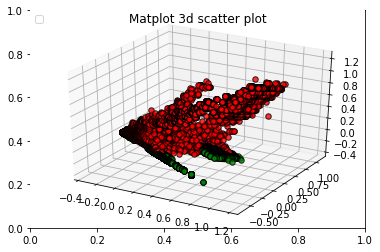

In [115]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d




# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
ax = fig.gca(projection='3d')

for data, color in zip(X, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30)

plt.title('Matplot 3d scatter plot')
plt.legend(loc=2)
plt.show()
